In [1]:
import matplotlib
%matplotlib inline
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
import corner

data_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Data'
results_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Results'

In [2]:
fit_params = []
phasepaths = []
coefficients = []

with open('phasefiles_filtered.txt', 'r') as f:
    
    for line in f:
        

        phasefile = "aored_{0}_poldm_phase.fits".format(line.rstrip())
        phasedirectory = "aored_{0}_poldm_phase_GPI".format(line.rstrip())
        
        phasepath = os.path.join(data_directory, phasefile)
        parameterpath = os.path.join(results_directory, phasedirectory, 
                                         'Graphs', '{}_PSD_fit.csv'.format(phasedirectory))
        
        coefficientpath = os.path.join(results_directory, phasedirectory,
                                      '{}_coefficients.csv'.format(phasedirectory))
        
        coefficient = np.loadtxt(coefficientpath, dtype=np.float64, delimiter=',')
        coefficients.append(coefficient)
        
        try:
            fit = np.loadtxt(parameterpath, dtype=np.float64, delimiter=',')
            fit_params.append(fit)
            phasepaths.append(phasepath)
        except IOError:
            print phasefile
            
    print len(fit_params)

166


In [3]:
print coefficientpath

/nfs/slac/g/ki/ki19/lsst/snyder18/Results/aored_When_2016.3.28_5.52.6_poldm_phase_GPI/aored_When_2016.3.28_5.52.6_poldm_phase_GPI_coefficients.csv


In [4]:
## Header keys for measurements that may be of interest

aokeys = ['AOFOLDTP', 'AOFOLDTT']

tempkeys = ['GLITEMP', 'GLOTEMP', 'AEXITEMP', 'AEXOTEMP', 'OMSATEMP', 'OMSMTEMP', 'IFSITEMP']

humidkeys = ['EEHUMID', 'MEMHUMID', 'OMSHUMID', 'AMBHUMID'] 

misckeys = ['CALBTILT', 'CALBTIP', 'ELEVATION', 'PRESSURE', 'HUMIDITY', 'TAMBIENT', 'WINDSPEE', 'PAR_ANG', 'AZIMUTH', 'RA', 
            'DEC']

masskeys = ['DIMMSEE', 'MASSEE', 'MASSTAU', 'MASS05CN', 'MASS1CN2',
            'MASS2CN2', 'MASS4CN2', 'MASS4CN2', 'MASS8CN2', 'MASS16CN']

windkeys = ['WINDSPEE', 'WINDM2']

In [5]:
## Get header variables for observations

dimm_list = []  # broken nights
mass_list = [] # broken nights
t_list = [] # very few broken nights
wind_list = []
hum_list = []
tau_list = [] # broken nights

for phasepath in phasepaths:
    hdulist = fits.open(phasepath, memmap=True)
    dimm_list.append(float(hdulist[0].header['DIMMSEE']))
    mass_list.append(float(hdulist[0].header['MASSEE']))
    t_list.append(float(hdulist[0].header['TAMBIENT']))
    wind_list.append(float(hdulist[0].header['WINDSPEE']))
    hum_list.append(float(hdulist[0].header['HUMIDITY']))
    tau_list.append(float(hdulist[0].header['MASSTAU']))
    hdulist.close()

In [8]:
## Get Zernike PSD parameters

Z_noll = 9

slopes = np.asarray([fit[0, Z_noll-1] for fit in fit_params])
intercepts = np.asarray([fit[1, Z_noll-1] for fit in fit_params])

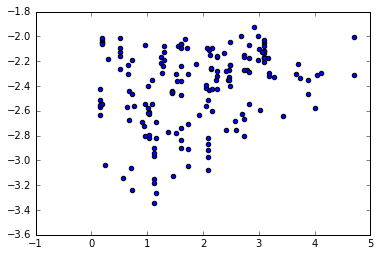

In [17]:
plt.scatter(tau_list, slopes)

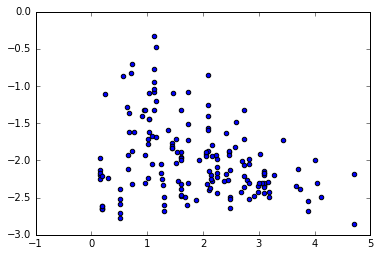

In [18]:
plt.scatter(tau_list, intercepts)

In [26]:
print type(slopes[0])

<type 'numpy.float64'>


In [39]:
np.corrcoef(tau_list, intercepts)

array([[ 1.       , -0.2788673],
       [-0.2788673,  1.       ]])

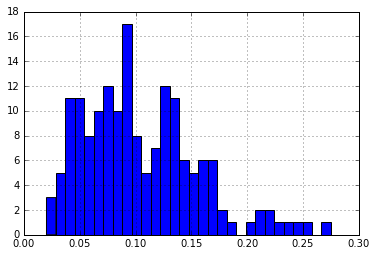

In [27]:
Z_noll = 5

var_list = []

for coefficient in coefficients:
    
    var = np.var(coefficient[Z_noll-1, :])
    var_list.append(var)
    
n, bins, patches = plt.hist(var_list, 30)
plt.grid(True)

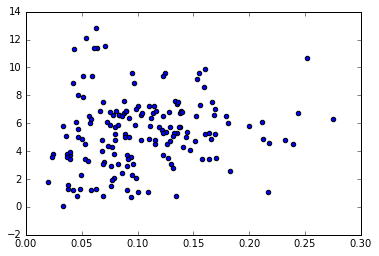

In [28]:
plt.scatter(var_list, wind_list)